In [11]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

2024-04-18 16:02:15.094031: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-18 16:02:15.140894: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-04-18 16:02:15.346711: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-18 16:02:15.346795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-18 16:02:15.382467: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to

In [12]:
df = pd.read_csv("train.csv")

In [13]:
df

,similarity manual,sbert,pubmedbert,biobert,puborgbert,bioorgbert,bert,llama,m2bert,bge
0,0,0.453923,0.935140,0.386132,0.527341,0.950502,0.934557,0.889903,0.923969,0.665580
1,0,0.485292,0.941220,0.509613,0.561634,0.946506,0.909169,0.814099,0.946802,0.632300
2,0,0.559043,0.917788,0.427672,0.461742,0.875502,0.841593,0.807784,0.894164,0.615253
3,0,0.527700,0.929142,0.471354,0.503192,0.940895,0.894422,0.841977,0.947778,0.639348
4,0,0.377659,0.907629,0.365420,0.415035,0.804998,0.832242,0.751162,0.917314,0.599159
...,...,...,...,...,...,...,...,...,...,...
480649,0,0.270151,0.892539,0.272848,0.478277,0.810540,0.824792,0.837111,0.931299,0.605287
480650,0,0.449980,0.900670,0.336563,0.575399,0.775527,0.866774,0.840473,0.947185,0.699750
480651,0,0.136749,0.870481,0.228841,0.118398,0.782337,0.808324,0.380598,0.849513,0.508458
480652,0,0.442946,0.903216,0.233632,0.517640,0.774377,0.855763,0.700416,0.959992,0.650120


In [14]:
df.head(4)

,similarity manual,sbert,pubmedbert,biobert,puborgbert,bioorgbert,bert,llama,m2bert,bge
0,0,0.453923,0.935140,0.386132,0.527341,0.950502,0.934557,0.889903,0.923969,0.665580
1,0,0.485292,0.941220,0.509613,0.561634,0.946506,0.909169,0.814099,0.946802,0.632300
2,0,0.559043,0.917788,0.427672,0.461742,0.875502,0.841593,0.807784,0.894164,0.615253
3,0,0.527700,0.929142,0.471354,0.503192,0.940895,0.894422,0.841977,0.947778,0.639348


In [15]:
df['similarity manual']

0         0
1         0
2         0
3         0
4         0
         ..
480649    0
480650    0
480651    0
480652    0
480653    0
Name: similarity manual, Length: 480654, dtype: int64

In [16]:

# Define Focal Loss function
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        
        epsilon = tf.keras.backend.epsilon()
        pt_1 = tf.clip_by_value(pt_1, epsilon, 1. - epsilon)
        pt_0 = tf.clip_by_value(pt_0, epsilon, 1. - epsilon)
        
        return -tf.reduce_sum(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_sum((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

In [17]:

# Build the model
def build_model(input_shape):
    model = models.Sequential([
        layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(128, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(128, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    return model

In [19]:
df.columns

Index(['similarity manual', 'sbert', 'pubmedbert', 'biobert', 'puborgbert',
       'bioorgbert', 'bert', 'llama', 'm2bert', 'bge'],
      dtype='object')

Epoch 1/10
15021/15021 [==============================] - 15s 966us/step - loss: 0.0490 - accuracy: 0.9975
Epoch 2/10
15021/15021 [==============================] - 14s 942us/step - loss: 0.0446 - accuracy: 0.9975
Epoch 3/10
15021/15021 [==============================] - 13s 871us/step - loss: 0.0444 - accuracy: 0.9975
Epoch 4/10
15021/15021 [==============================] - 13s 878us/step - loss: 0.0440 - accuracy: 0.9975
Epoch 5/10
15021/15021 [==============================] - 13s 863us/step - loss: 0.0440 - accuracy: 0.9975
Epoch 6/10
15021/15021 [==============================] - 13s 873us/step - loss: 0.0438 - accuracy: 0.9975
Epoch 7/10
15021/15021 [==============================] - 12s 821us/step - loss: 0.0435 - accuracy: 0.9975
Epoch 8/10
15021/15021 [==============================] - 13s 889us/step - loss: 0.0436 - accuracy: 0.9975
Epoch 9/10
15021/15021 [==============================] - 14s 933us/step - loss: 0.0434 - accuracy: 0.9975
Epoch 10/10
15021/15021 [============

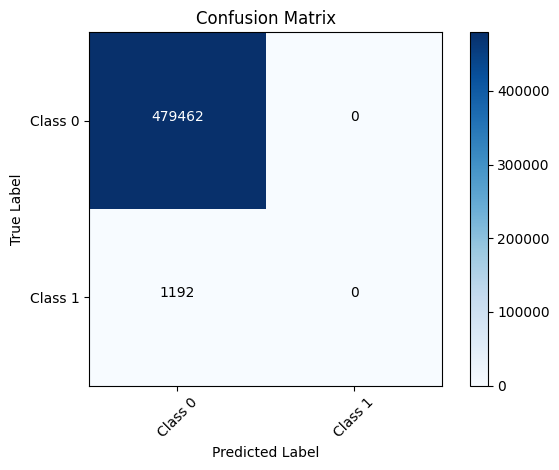

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Define Focal Loss function
def focal_loss(gamma=2., alpha=0.25):
    def focal_loss_fixed(y_true, y_pred):
        pt_1 = tf.where(tf.equal(y_true, 1), y_pred, tf.ones_like(y_pred))
        pt_0 = tf.where(tf.equal(y_true, 0), y_pred, tf.zeros_like(y_pred))
        
        epsilon = tf.keras.backend.epsilon()
        pt_1 = tf.clip_by_value(pt_1, epsilon, 1. - epsilon)
        pt_0 = tf.clip_by_value(pt_0, epsilon, 1. - epsilon)
        
        return -tf.reduce_sum(alpha * tf.pow(1. - pt_1, gamma) * tf.math.log(pt_1)) \
               -tf.reduce_sum((1 - alpha) * tf.pow(pt_0, gamma) * tf.math.log(1. - pt_0))
    return focal_loss_fixed

# Load your dataset using pandas
data = pd.read_csv('train.csv')  # Replace 'your_dataset.csv' with your actual file path

# Assuming your dataset has features and a target column
X = data.drop(columns=['similarity manual'])  # Adjust the column name accordingly
y = data['similarity manual']

# Convert to numpy array
X = X.values
y = y.values

# Build the model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Compile the model with Focal Loss
model.compile(optimizer='adam', loss=focal_loss(), metrics=['accuracy'])

# Train the model
model.fit(X, y, epochs=10, batch_size=32)

# Predict on training data
y_pred = model.predict(X)
y_pred = np.round(y_pred).flatten()

# Calculate confusion matrix
cm = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > cm.max() / 2. else "black")

plt.tight_layout()
plt.show()


/home/anonymous/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


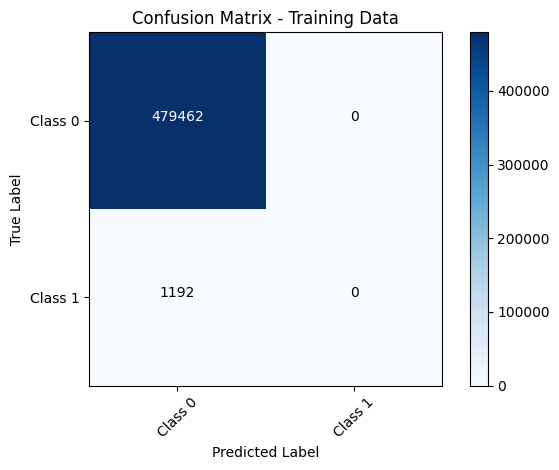

In [22]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# Load your dataset using pandas
data = pd.read_csv('train.csv')  # Replace 'train.csv' with your actual file path

# Assuming your dataset has features and a target column
X_train = data.drop(columns=['similarity manual'])  # Adjust the column name accordingly
y_train = data['similarity manual']

# Build and train the model
model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=10)
model.fit(X_train, y_train)

# Predict on training data
y_pred_train = model.predict(X_train)

# Calculate confusion matrix
cm_train = confusion_matrix(y_train, y_pred_train)

# Plot confusion matrix
plt.imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Training Data')
plt.colorbar()
classes = ['Class 0', 'Class 1']
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, format(cm_train[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > cm_train.max() / 2. else "black")

plt.tight_layout()
plt.show()


In [24]:
import pandas as pd

# Load the test dataset using pandas
test_data = pd.read_csv('test.csv')

# Extract features from the test data
X_test = test_data[['sbert', 'pubmedbert', 'biobert', 'puborgbert', 'bioorgbert', 'bert', 'llama', 'm2bert', 'bge']]

# Predict using the trained model
y_pred_test = model.predict(X_test)

# Get the IDs from the original test dataset
IDs = test_data['ID'].values

# Create a DataFrame to store the predictions along with the IDs
submission_df = pd.DataFrame({'ID': IDs, 'similarity manual': y_pred_test})

# Save the predictions to a CSV file
submission_df.to_csv('submission.csv', index=False)
